# Q1 A

In [1]:
import numpy as np
from collections import Counter

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

def classify_fruit(new_fruit, fruits, k=3):
    distances = []
    
    for fruit in fruits:
        weight, sweetness, label = fruit
        fruit_array = np.array([weight, sweetness])
        dist_euclidean = euclidean_distance(new_fruit, fruit_array)
        distances.append((dist_euclidean, label))
    
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    
    labels = [neighbor[1] for neighbor in nearest_neighbors]
    return Counter(labels).most_common(1)[0][0]

# Data
fruits = [
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]
new_fruit = np.array([165, 5.5])

# Classify
label = classify_fruit(new_fruit, fruits, k=3)
label


'Apple'

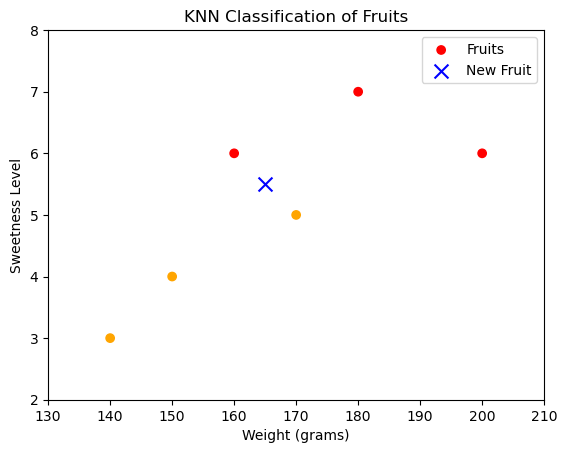

In [2]:
import matplotlib.pyplot as plt

# Prepare data for plotting
weights = [fruit[0] for fruit in fruits]
sweetness = [fruit[1] for fruit in fruits]
labels = [fruit[2] for fruit in fruits]

# Plot the fruits
plt.scatter(weights, sweetness, c=['red' if label == 'Apple' else 'orange' for label in labels], label='Fruits')
plt.scatter(new_fruit[0], new_fruit[1], c='blue', marker='x', s=100, label='New Fruit')

# Decision boundary
x_min, x_max = 130, 210
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
Z = np.array([classify_fruit(np.array([x, y]), fruits, k=3) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
                       
#plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits')
plt.legend()
plt.show()


# Q1 B

Euclidean Distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan Distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski Distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


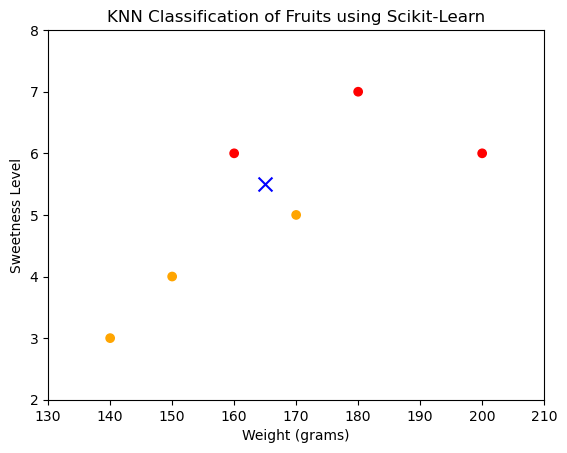

Predicted label for the new fruit: Orange


In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Dataset
X = np.array([[180, 7], [200, 6], [150, 4], [170, 5], [160, 6], [140, 3]])
y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# New fruit
new_fruit = np.array([[165, 5.5]])
predicted_label = knn.predict(new_fruit)

# Calculate distances
from sklearn.metrics import pairwise_distances
euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean').flatten()
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan').flatten()
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3).flatten()

# Print distances
print("Euclidean Distances:", euclidean_distances)
print("Manhattan Distances:", manhattan_distances)
print("Minkowski Distances:", minkowski_distances)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=['red' if label == 'Apple' else 'orange' for label in y])
plt.scatter(new_fruit[0][0], new_fruit[0][1], c='blue', marker='x', s=100)

# Decision boundary
x_min, x_max = 130, 210
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits using Scikit-Learn')
plt.show()

# Print the predicted label for the new fruit
print("Predicted label for the new fruit:", predicted_label[0])


# Q2 A

In [4]:
import numpy as np

# Dataset
data = np.array([
    [30, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy'],
    [50, 'High', 'High', 'Sick'],
    [35, 'Low', 'Normal', 'Healthy'],
    [60, 'High', 'High', 'Sick'],
    [55, 'Low', 'Normal', 'Healthy'],
    [40, 'High', 'High', 'Sick'],
    [25, 'Low', 'Normal', 'Healthy'],
    [65, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy']
])

diagnosis = data[:, 3]

def entropy_of_subset(subset):
    labels, counts = np.unique(subset, return_counts=True)
    probabilities = counts / len(subset)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature_index, diagnosis):
    total_entropy = entropy_of_subset(diagnosis)
    feature_values = np.unique(data[:, feature_index])
    weighted_entropy = 0.0
    
    for value in feature_values:
        subset = diagnosis[data[:, feature_index] == value]
        weighted_entropy += (len(subset) / len(diagnosis)) * entropy_of_subset(subset)
    
    return total_entropy - weighted_entropy

ig_age = information_gain(data, 0, diagnosis)
ig_bp = information_gain(data, 1, diagnosis)
ig_chol = information_gain(data, 2, diagnosis)

features = ['Age', 'Blood Pressure', 'Cholesterol']
gains = [ig_age, ig_bp, ig_chol]
best_feature_index = np.argmax(gains)
best_feature = features[best_feature_index]

print(f"Entropy of Diagnosis: {entropy_of_subset(diagnosis):.4f}")
print(f"Information Gain for Age: {ig_age:.4f}")
print(f"Information Gain for Blood Pressure: {ig_bp:.4f}")
print(f"Information Gain for Cholesterol: {ig_chol:.4f}")
print(f"Best feature for root node: {best_feature}")

def predict(age, bp, chol):
    if age <= 40:  # Example split based on Age
        if bp == 'High':
            return 'Sick'
        else:
            return 'Healthy'
    else:
        if chol == 'High':
            return 'Sick'
        else:
            return 'Healthy'

# Predict for a 50-year-old with low blood pressure and normal cholesterol
prediction = predict(50, 'Low', 'Normal')
print(f"Prediction for a 50-year-old with Low BP and Normal Cholesterol: {prediction}")


Entropy of Diagnosis: 1.0000
Information Gain for Age: 1.0000
Information Gain for Blood Pressure: 1.0000
Information Gain for Cholesterol: 1.0000
Best feature for root node: Age
Prediction for a 50-year-old with Low BP and Normal Cholesterol: Healthy


# Q2 B

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Define the dataset
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

# Split data into features and target variable
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Print the decision tree structure
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Predict for a 50-year-old with low blood pressure and normal cholesterol
new_patient = [[50, 0, 0]]  # Age: 50, Blood Pressure: Low (0), Cholesterol: Normal (0)
prediction = clf.predict(new_patient)

# Output the prediction
predicted_label = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f"Prediction for a 50-year-old with Low BP and Normal Cholesterol: {predicted_label}")


Decision Tree Rules:
 |--- Blood Pressure <= 0.50
|   |--- class: 0
|--- Blood Pressure >  0.50
|   |--- class: 1

Prediction for a 50-year-old with Low BP and Normal Cholesterol: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
